In [1]:
import pandas as pd
import numpy as np

In [2]:
file = 'Corona Virus Dataset.csv'
url = 'Countries_By_GDP.csv'

In [3]:
df = pd.read_csv(file)
df_1 = pd.read_csv(url)

In [5]:
df_1.head()

,Country,UN Region,GDP(USD)(2021)
0,Afghanistan,Asia,373
1,Algeria,Africa,3700
2,Argentina,Americas,10761
3,Australia,Oceania,66916
4,Austria,Europe,53840


In [4]:
df.head()

,Country,Latitude,Longitude,Date,Confirmed,Deaths,Recovered
0,Afghanistan,17275.00699,34464.366077,22-01-202023-01-202024-01-202025-01-202026-01-...,89861,3527,61438
1,Algeria,14269.25510,844.736400,22-01-202023-01-202024-01-202025-01-202026-01-...,133388,3571,92966
2,Argentina,-19553.79490,-32380.900300,22-01-202023-01-202024-01-202025-01-202026-01-...,4124190,85343,3721350
3,Australia,-130736.75180,575599.545100,22-01-202023-01-202024-01-202025-01-202026-01-...,30365,911,26737
4,Austria,24185.74580,7406.000900,22-01-202023-01-202024-01-202025-01-202026-01-...,648620,10663,634624


In [6]:
df.drop(['Latitude','Longitude','Date'],axis = 1,inplace = True)

In [7]:
df_1.rename(columns = {'Country':'Province','GDP(USD)(2021)':'GDP($)'},inplace = True)

In [8]:
df.groupby('Country').sum()

,Confirmed,Deaths,Recovered
Country,,,
Afghanistan,89861,3527,61438
Algeria,133388,3571,92966
Argentina,4124190,85343,3721350
Australia,30365,911,26737
Austria,648620,10663,634624
...,...,...,...
Vietnam,10630,60,4050
West Bank and Gaza,311534,3533,303826
Yemen,6863,1349,3743


In [9]:
# combine both tables

In [10]:
data = pd.concat([df,df_1],axis = 1)

In [11]:
data.drop('Province',axis = 1, inplace = True)

In [12]:
data.head()

,Country,Confirmed,Deaths,Recovered,UN Region,GDP($)
0,Afghanistan,89861,3527,61438,Asia,373
1,Algeria,133388,3571,92966,Africa,3700
2,Argentina,4124190,85343,3721350,Americas,10761
3,Australia,30365,911,26737,Oceania,66916
4,Austria,648620,10663,634624,Europe,53840


In [13]:
# find confirmed,Deaths and Recovered by UN Regions

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data.set_index('Country',inplace = True)

In [16]:
data['Percentage DC'] = (data['Deaths']/data['Confirmed']) * 100
data['Percentage RC'] = (data['Recovered']/data['Confirmed']) * 100
data.head()

,Confirmed,Deaths,Recovered,UN Region,GDP($),Percentage DC,Percentage RC
Country,,,,,,,
Afghanistan,89861,3527,61438,Asia,373,3.924951,68.370038
Algeria,133388,3571,92966,Africa,3700,2.677152,69.695925
Argentina,4124190,85343,3721350,Americas,10761,2.069328,90.232264
Australia,30365,911,26737,Oceania,66916,3.000165,88.052034
Austria,648620,10663,634624,Europe,53840,1.643952,97.842188


In [17]:
data_1 = data.groupby(['UN Region'],as_index = True).sum()

In [18]:
data_1

,Confirmed,Deaths,Recovered,GDP($),Percentage DC,Percentage RC
UN Region,,,,,,
Africa,4472392,122238,4003029,77945,55.335999,2133.027309
Americas,67882067,1778721,36504316,293042,51.866188,1594.050747
Asia,51501203,703034,48534003,551141,73.562214,3200.115414
Europe,45176393,1042964,24018798,1337883,69.811019,2140.401460
Oceania,33089,937,29402,127535,3.958160,365.988658


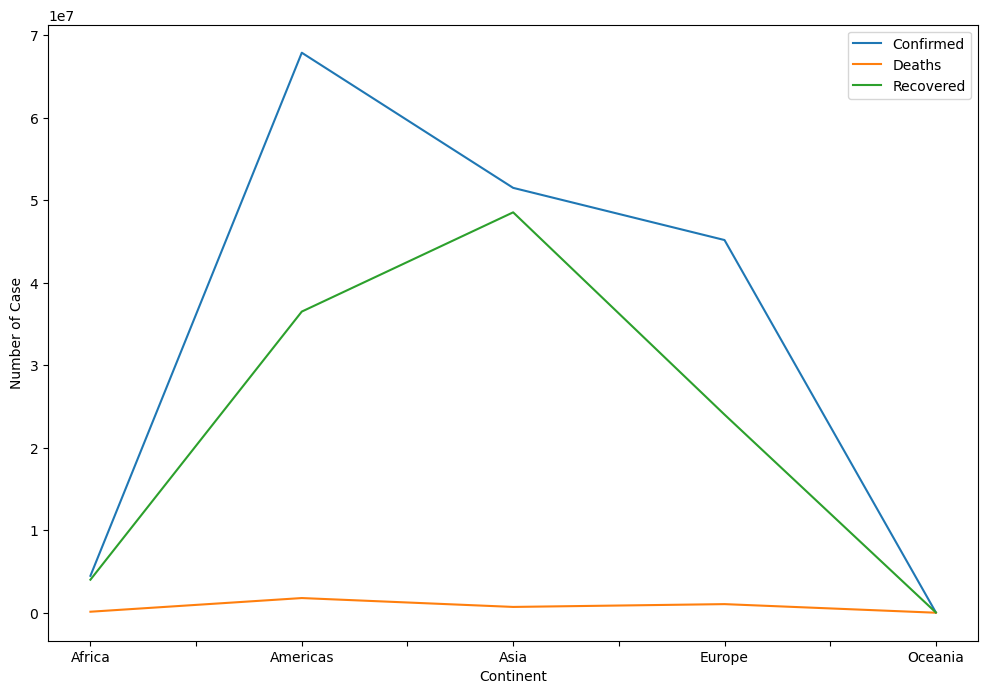

In [19]:
data_1[['Confirmed','Deaths','Recovered']].plot(kind = 'line',figsize = (12,8))
plt.ylabel('Number of Case')
plt.xlabel('Continent')
           
plt.show()

In [20]:
# find the Top 10 countries by GDP with Death and Recovery rate

In [21]:
df_2 = data.sort_values(by = 'GDP($)',ascending = False)

In [22]:
df_2 = df_2.head(10)

In [23]:
df_2

,Confirmed,Deaths,Recovered,UN Region,GDP($),Percentage DC,Percentage RC
Country,,,,,,,
Luxembourg,71754,820,74648,Europe,133745,1.142793,104.033225
Ireland,266804,4960,23364,Europe,101109,1.859043,8.756990
Switzerland,700051,10989,317600,Europe,93525,1.569743,45.368123
Norway,128046,790,17998,Europe,89242,0.616966,14.055886
US,33461982,599769,6303715,Americas,75269,1.792389,18.838439
Iceland,6556,35,6514,Europe,69133,0.533862,99.359365
Denmark,291920,2531,278470,Europe,68037,0.867018,95.392573
Australia,30365,911,26737,Oceania,66916,3.000165,88.052034
Singapore,62297,34,61869,Asia,66822,0.054577,99.312969


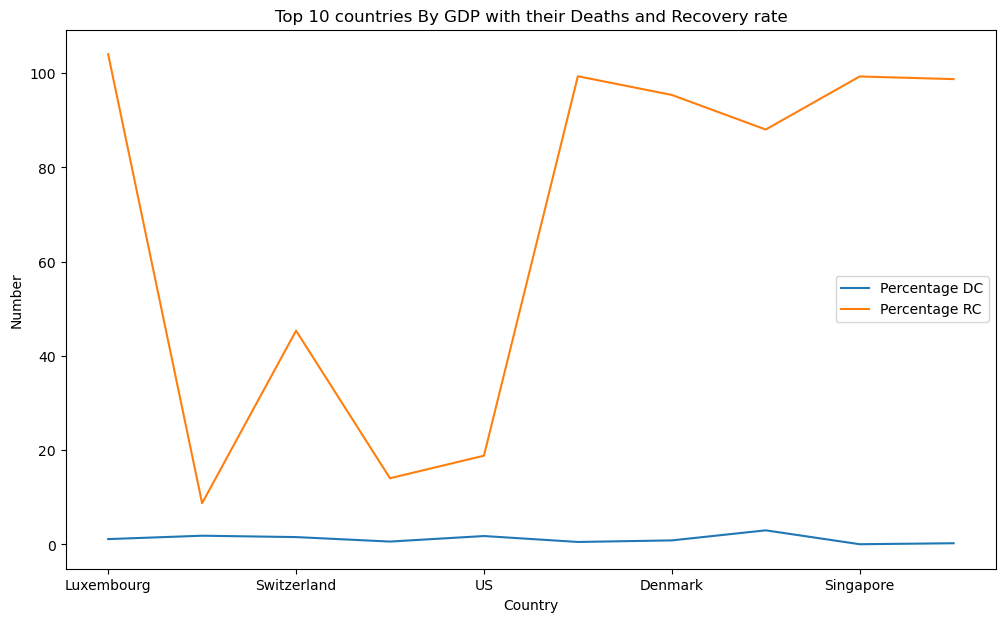

In [24]:
df_2[['Percentage DC','Percentage RC']].plot(kind = 'line',figsize = (12,7))
plt.ylabel('Number')
plt.title('Top 10 countries By GDP with their Deaths and Recovery rate')

plt.show()

In [25]:
# plot a graph to show the deaths to confirmed percent ratio and Recovered to Confirmed percent ratio.

In [26]:
data.head()

,Confirmed,Deaths,Recovered,UN Region,GDP($),Percentage DC,Percentage RC
Country,,,,,,,
Afghanistan,89861,3527,61438,Asia,373,3.924951,68.370038
Algeria,133388,3571,92966,Africa,3700,2.677152,69.695925
Argentina,4124190,85343,3721350,Americas,10761,2.069328,90.232264
Australia,30365,911,26737,Oceania,66916,3.000165,88.052034
Austria,648620,10663,634624,Europe,53840,1.643952,97.842188


<Axes: xlabel='Country'>

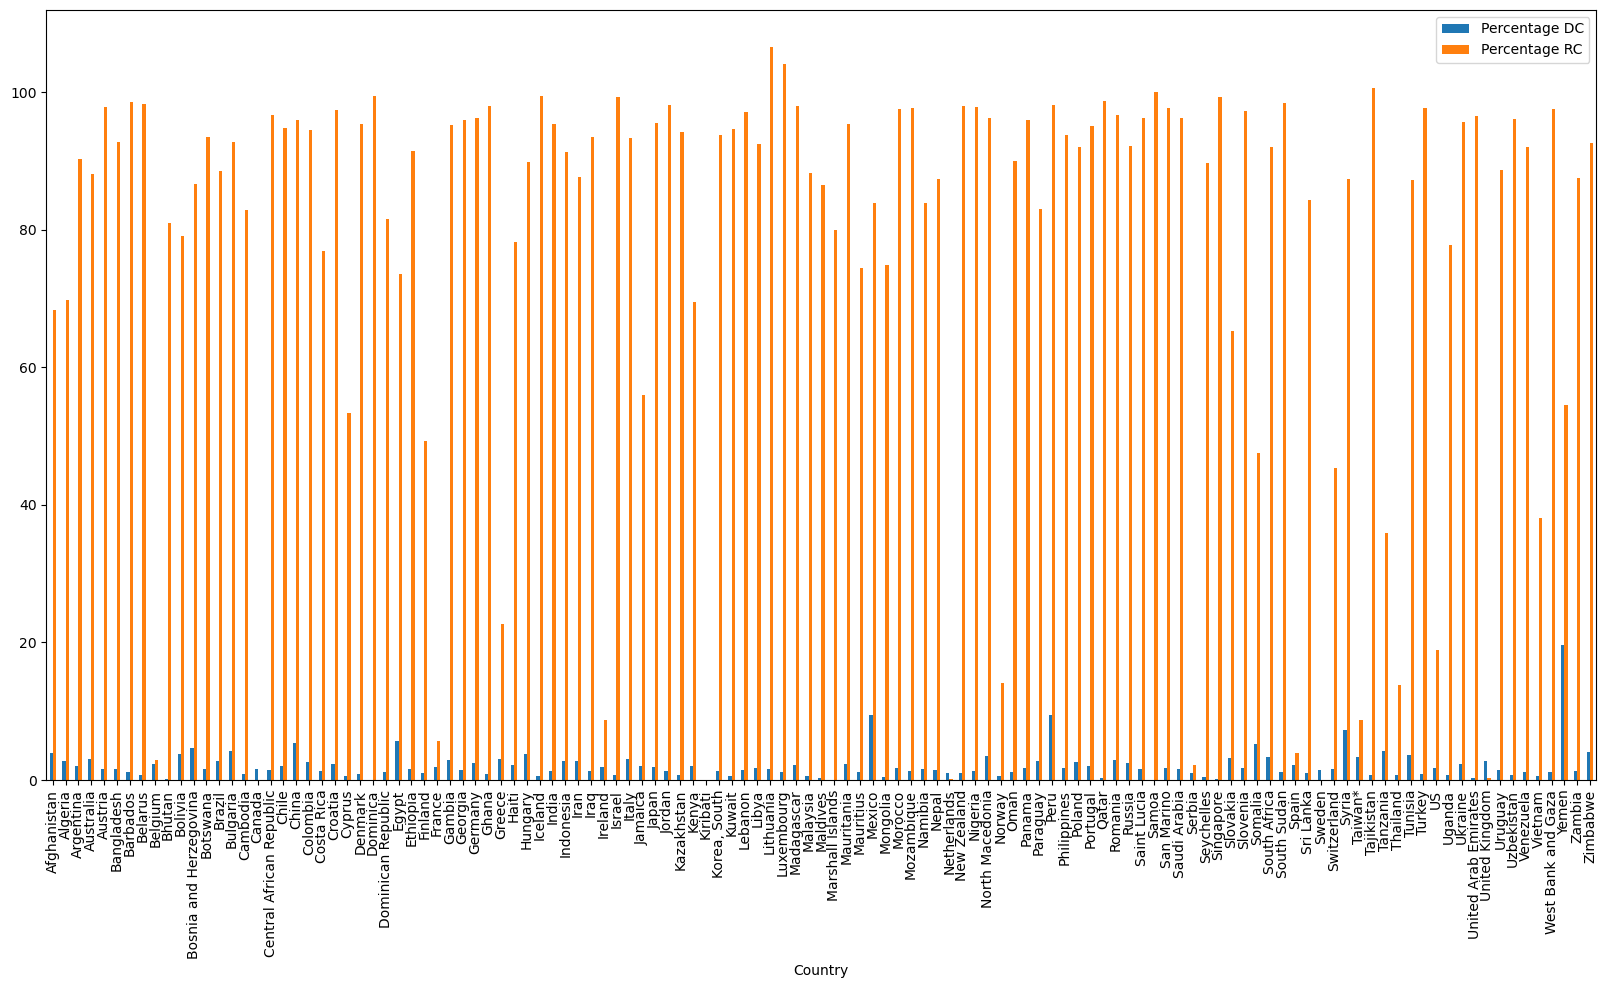

In [27]:
data[['Percentage DC','Percentage RC']].plot(kind = 'bar',figsize = (20,10))

In [28]:
#what is the corrolation between GDP and Confirmed, Deaths percentage ratio and Recovered percentage ratio. create a corolation heatmap

In [29]:
data_2 = data._get_numeric_data()

In [30]:
data_2.head()

,Confirmed,Deaths,Recovered,GDP($),Percentage DC,Percentage RC
Country,,,,,,
Afghanistan,89861,3527,61438,373,3.924951,68.370038
Algeria,133388,3571,92966,3700,2.677152,69.695925
Argentina,4124190,85343,3721350,10761,2.069328,90.232264
Australia,30365,911,26737,66916,3.000165,88.052034
Austria,648620,10663,634624,53840,1.643952,97.842188


In [31]:
data_2.corr()['GDP($)'].sort_values()

Percentage RC   -0.285504
Percentage DC   -0.173485
Recovered       -0.053484
Deaths           0.088825
Confirmed        0.108664
GDP($)           1.000000
Name: GDP($), dtype: float64

In [32]:
data_heatmap = data_2[['GDP($)','Percentage DC','Percentage RC']]

In [33]:
data_corrolation = data_heatmap.corr()

<Axes: >

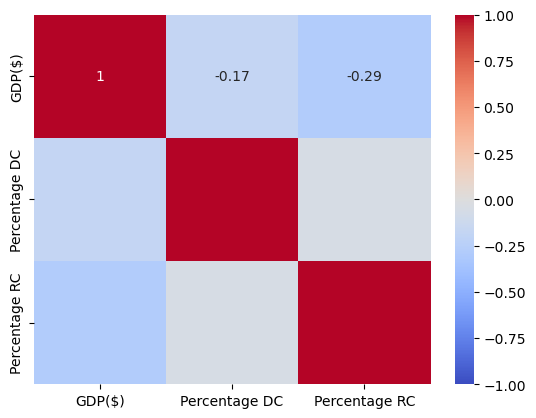

In [34]:
sns.heatmap(data_corrolation,annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [35]:
# create a pairplot for GDP,Percentage DC and percentage RC

C:\Users\Andrew\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Andrew\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Andrew\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


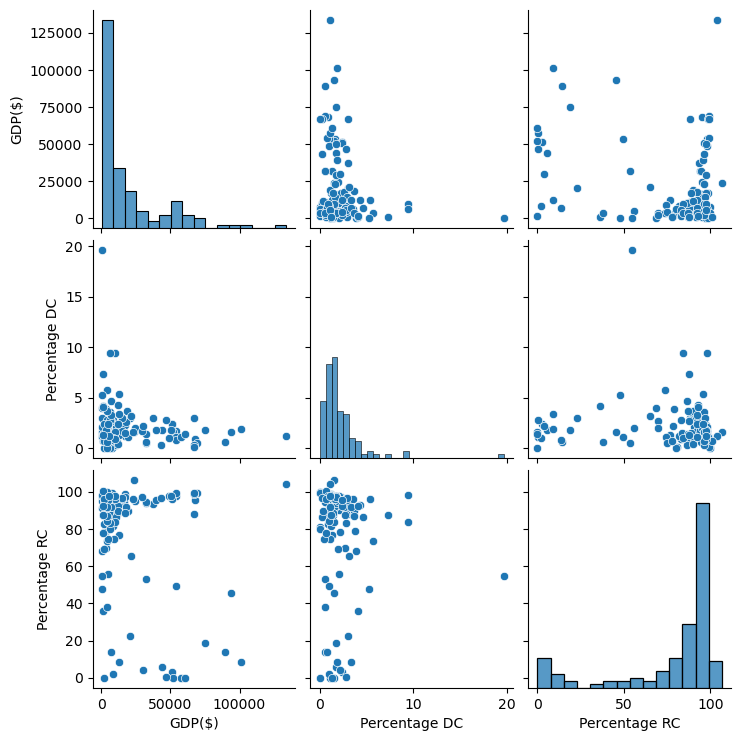

In [36]:
sns.pairplot(data_2[['GDP($)','Percentage DC','Percentage RC']])

plt.show()

In [37]:
# create a Scatter plot with regression line for GDP vs Percentage DC

<Axes: xlabel='GDP($)', ylabel='Percentage DC'>

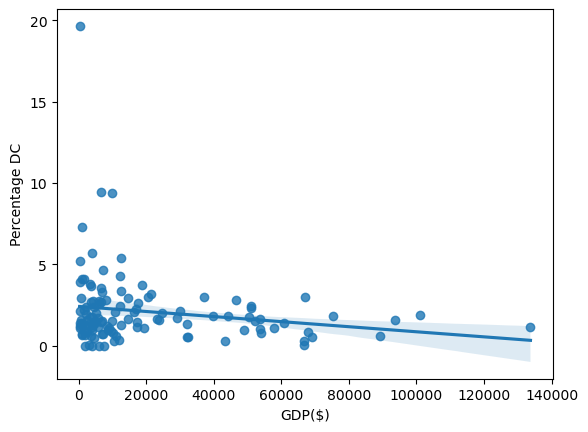

In [38]:
sns.regplot(x = 'GDP($)',y = 'Percentage DC', data = data_2)

In [39]:
# create a Scatter plot with regression line for GDP vs Percentage RC

<Axes: xlabel='GDP($)', ylabel='Percentage RC'>

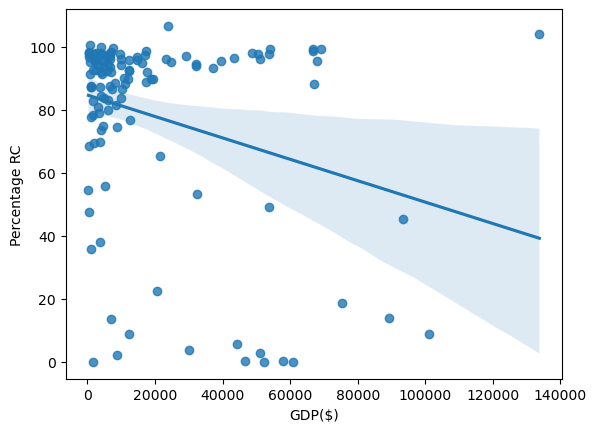

In [40]:
sns.regplot(x = 'GDP($)',y = 'Percentage RC', data = data_2)

In [41]:
# predict the Deaths to Confirm percent ratio in case of future incdent of similar magnitude

In [42]:
x = data_2[['Confirmed','Recovered','Deaths','GDP($)','Percentage RC']]

In [43]:
y = data_2['Percentage DC']

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [45]:
order = list(map(int,range(1,100)))

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =6 , random_state = 42)
lm = LinearRegression()
lm.fit(x_train,y_train)
R = lm.score(x_test,y_test)
R

0.7901270780941934

In [47]:
# categorize the GDP of the different countries and find the average percentage death and recovery rate of each bins

In [48]:
data.head()

,Confirmed,Deaths,Recovered,UN Region,GDP($),Percentage DC,Percentage RC
Country,,,,,,,
Afghanistan,89861,3527,61438,Asia,373,3.924951,68.370038
Algeria,133388,3571,92966,Africa,3700,2.677152,69.695925
Argentina,4124190,85343,3721350,Americas,10761,2.069328,90.232264
Australia,30365,911,26737,Oceania,66916,3.000165,88.052034
Austria,648620,10663,634624,Europe,53840,1.643952,97.842188


In [49]:
bins = np.linspace(min(data['GDP($)']),max(data['GDP($)']),6)
bins

array([   302. ,  26990.6,  53679.2,  80367.8, 107056.4, 133745. ])

In [50]:
group_name = ['Very Low','Low','Medium','High','Very High']

In [51]:
data['GDP binned'] = pd.cut(data['GDP($)'], bins, labels = group_name,include_lowest = True)

In [52]:
data.head()

,Confirmed,Deaths,Recovered,UN Region,GDP($),Percentage DC,Percentage RC,GDP binned
Country,,,,,,,,
Afghanistan,89861,3527,61438,Asia,373,3.924951,68.370038,Very Low
Algeria,133388,3571,92966,Africa,3700,2.677152,69.695925,Very Low
Argentina,4124190,85343,3721350,Americas,10761,2.069328,90.232264,Very Low
Australia,30365,911,26737,Oceania,66916,3.000165,88.052034,Medium
Austria,648620,10663,634624,Europe,53840,1.643952,97.842188,Medium


In [53]:
data_3 = data[['Confirmed','Deaths','Recovered','GDP($)','Percentage DC','Percentage RC','GDP binned']].groupby(['GDP binned'],as_index = True).mean()

C:\Users\Andrew\AppData\Local\Temp\ipykernel_15560\2400783921.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_3 = data[['Confirmed','Deaths','Recovered','GDP($)','Percentage DC','Percentage RC','GDP binned']].groupby(['GDP binned'],as_index = True).mean()


In [54]:
data_3.head()

,Confirmed,Deaths,Recovered,GDP($),Percentage DC,Percentage RC
GDP binned,,,,,,
Very Low,1.132419e+06,26133.285714,1.034128e+06,7213.912088,2.329306,83.368644
Low,1.762307e+06,39844.666667,6.759729e+05,41348.533333,1.665901,61.911452
Medium,3.492161e+06,59503.272727,7.646124e+05,63021.000000,1.126332,67.831905
High,3.649670e+05,5579.666667,1.196540e+05,94625.333333,1.348584,22.727000
Very High,7.175400e+04,820.000000,7.464800e+04,133745.000000,1.142793,104.033225


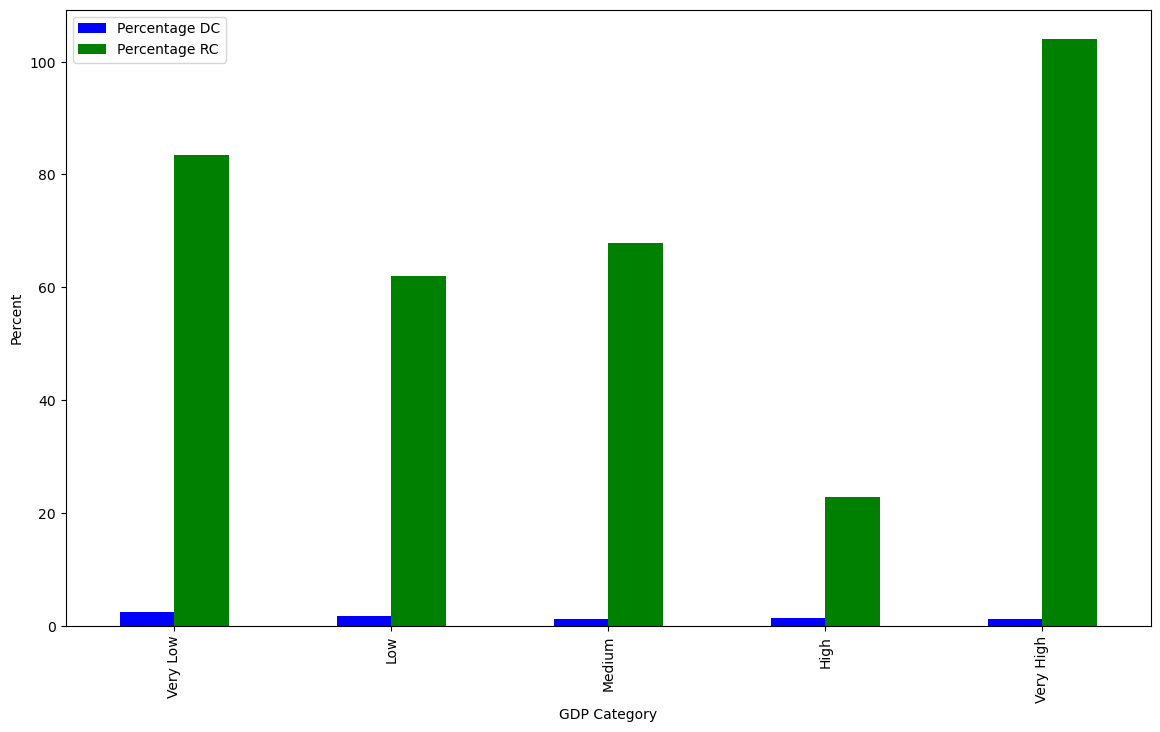

In [55]:
data_3[['Percentage DC','Percentage RC']].plot(kind = 'bar',figsize = (14,8), color = ['blue','green'])
plt.xlabel('GDP Category')
plt.ylabel('Percent')

plt.show()